# Solomon Akatakpo (Ph.D.)

## Bank Churn prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn import metrics
from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
# importing GridSearch CV
from sklearn.model_selection import GridSearchCV
# importing roc_curve to plot
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# importing SMOTE
from imblearn.over_sampling import SMOTE
# importing metrics
from sklearn import metrics
import random
#Importing classback API
from keras import callbacks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the dataset

In [ ]:
Data = pd.read_csv('/content/drive/MyDrive/Data_Science/Pre_Work_Deep_Learning/Bank_Churn.csv')

## Data Overview

### View the first and last 10 rows of the dataset.

In [ ]:
Data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
Data.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Understand the shape of the dataset

In [ ]:
Data.shape

(10000, 14)

- The dataset has 10000 rows and 14 columns

### Check the data types of the columns for the dataset

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- The dataset has 11 numerical columns and 3 object type columns
- The 10000 non-null values suggests that there are no missing values. This can be confirmed using the code below

In [ ]:
Data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

- There are no missing values in the data

### Checking the Statistical Summary

In [ ]:
Data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


- The RowNumber and CustomerId columns are unique columns and will be dropped later
- The average age of customers is 38.9 years, while the youngest and oldest customers are 18 years and 92 years, respectively. The mean and median age of customers are almost similar, suggesting an almost normal distribution of age
- The longest time a customer has been with the bank is 10 years. There are customers who have been with the bank for less than a year, while the mean age of customer being with the bank is 5 years.
- The average account balance of customers is 76485. There are customers with **zero** balance while he maximum balance is 250898
- The average number of products that the customers have purchased from a bank is 1.5 while the minimum and maximum a number of products is 1 and 4, respectively.
- The estimated salary has an average of 100090, with minimum of 11.58 and maximum of 199992
- The rest of the columns has categorical variables

### Checking for unique values for each of the column

In [ ]:
Data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

### Drop the columns which are unique for all users like IDs, names, and rownumbers

In [ ]:
# RowNumber , CustomerId and Surname are unique hence drop them
Data = Data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

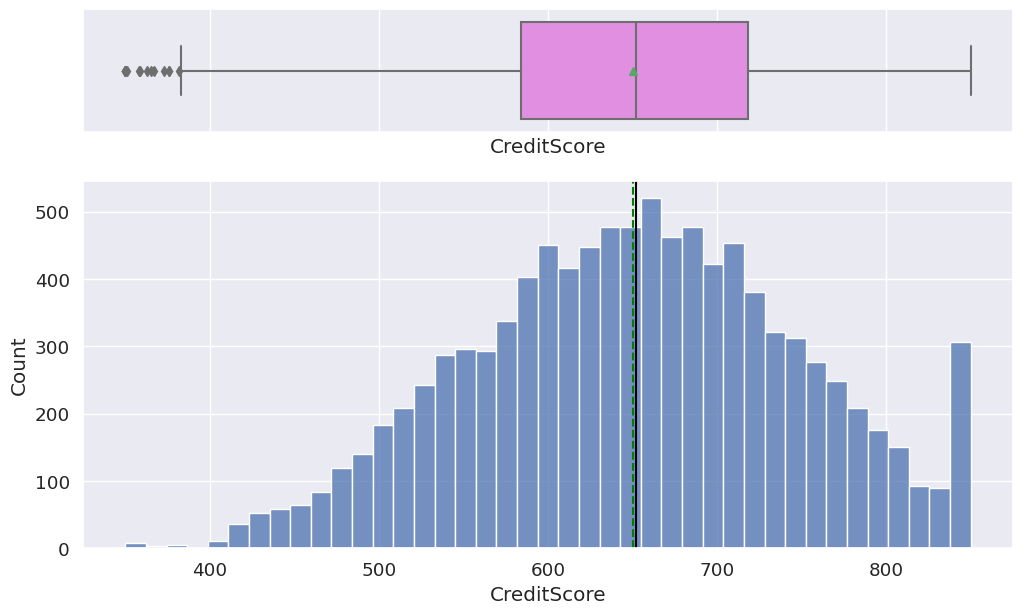

In [ ]:
histogram_boxplot(Data,'CreditScore')

- The CreditScore is slightly left skewed
- The CreditScore data has outlier on the lower end of the data
- The CreditScore is has a mean of 650 and median of 652

#### Observations on Age

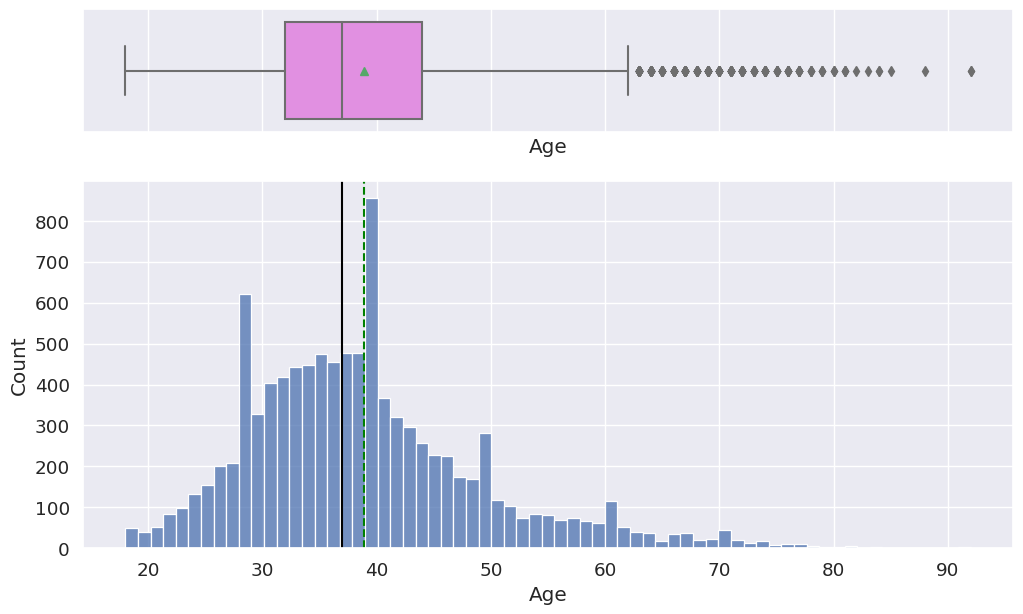

In [ ]:
histogram_boxplot(Data,'Age')

- The age of of customers is skewed to the right
- The customers have a mean age of 38.9 and a slightly lower median age of 37
- The customer age has outliers on the upper end of the data
- There are modal age of customers is 37. i.e. 478 customers out of the 10000 are 37 years old

In [ ]:
# Calculate the count of different ages
age_counts = Data['Age'].value_counts()

print("Age counts:")
print(age_counts)

Age counts:
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


#### Observations on Balance

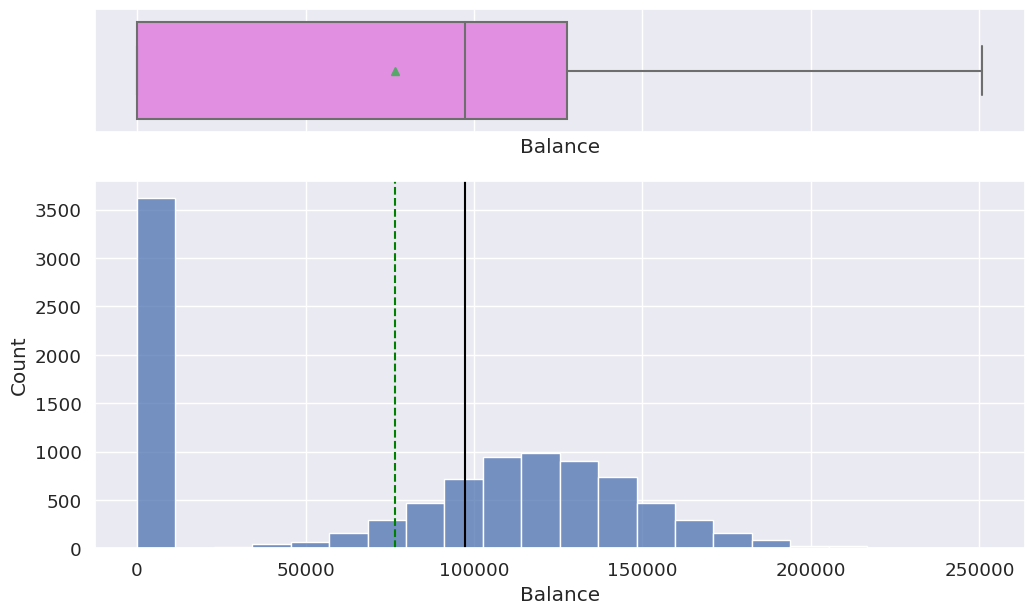

In [ ]:
histogram_boxplot(Data, 'Balance')

#### Observations on Estimated Salary

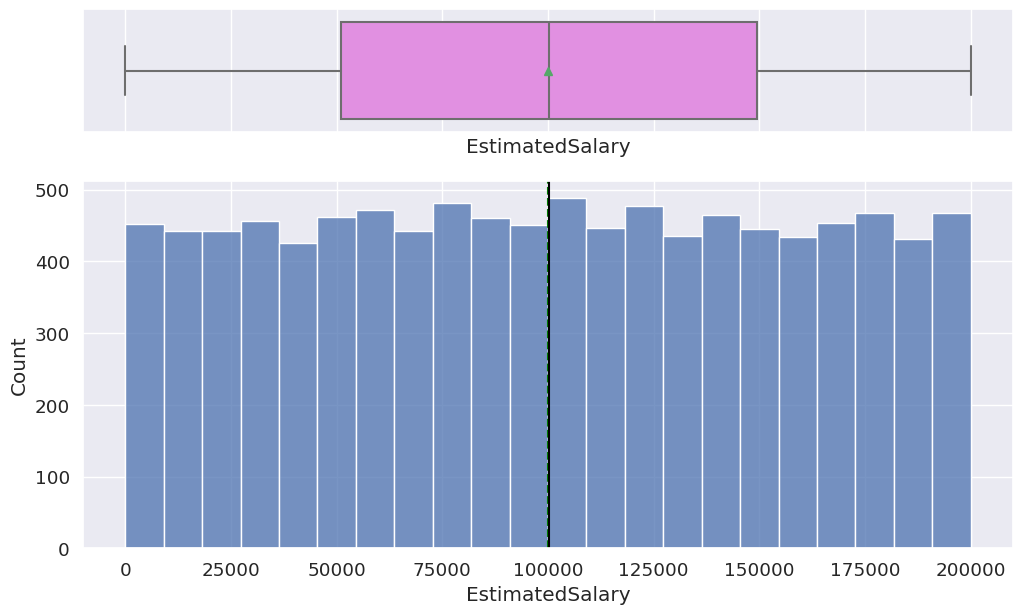

In [ ]:
histogram_boxplot(Data, 'EstimatedSalary')

- Estimated salary is uniformly distributed

#### Observations on Exited

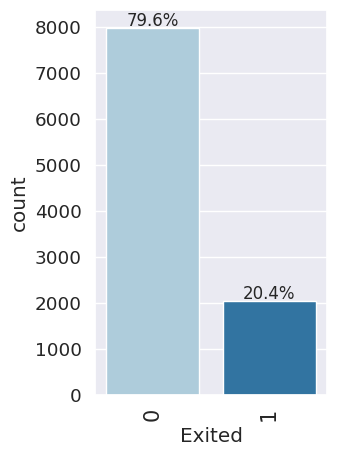

In [ ]:
labeled_barplot(Data, "Exited", perc=True)

- 79.6% of the cusomers are those who has not exited the bank while only 20.4% who has actually exited

#### Observations on Geography

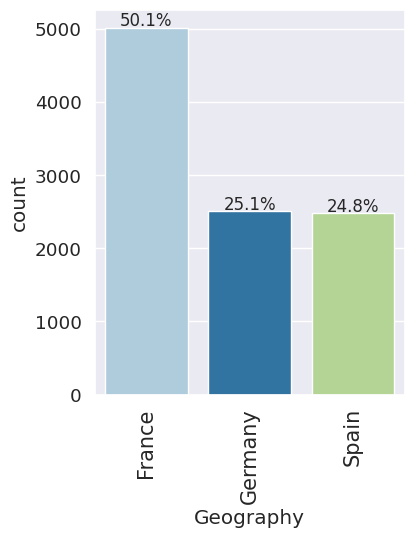

In [ ]:
labeled_barplot(Data, "Geography", perc=True)

- 50.1% of customers are located in France while the remaining half of the customers is equally distributed in in Germany and Spain

#### Observations on Gender

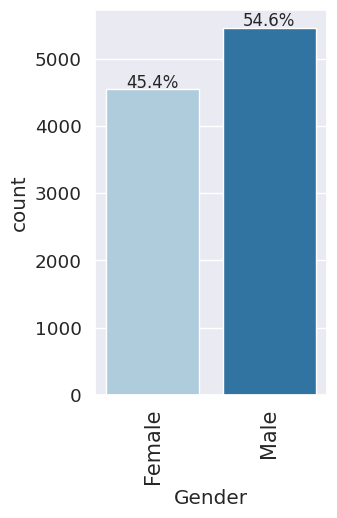

In [ ]:
labeled_barplot(Data, "Gender", perc=True)

- There are more male customers (54.6%) than female customers (45.4%)

#### Observations on Tenure

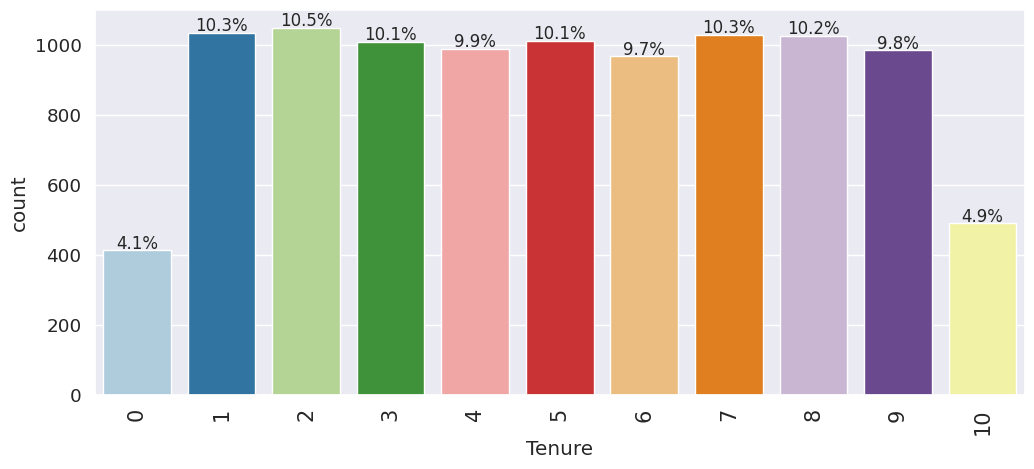

In [ ]:
labeled_barplot(Data, "Tenure", perc=True)

- ~ 1000 customers have been with the bank for each of of year 1 through year 9. Customers less than a year (410 customers) and 10 year (490 customers) in particular are fewe in number

#### Observations on Number of Products

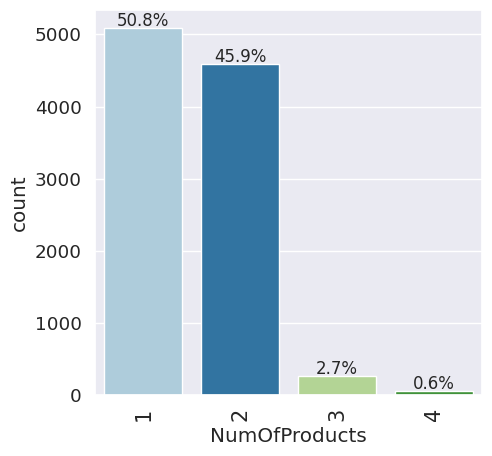

In [ ]:
labeled_barplot(Data, "NumOfProducts", perc=True)

- 50.8% of customers have only one product with the bank, and 45.9 % of the customers have 2 products with the bank. Only 2.7% of customers have 3 products with the bank and 0.6% of customers have 4 products with the bank

-

#### Observations on Has Credit Card

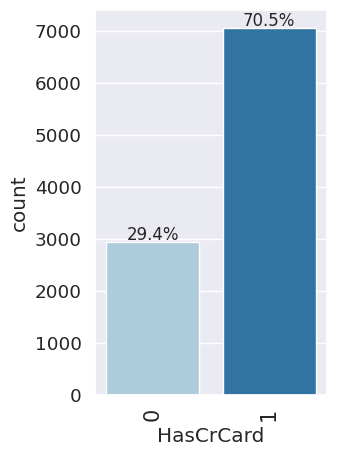

In [ ]:
labeled_barplot(Data, "HasCrCard", perc=True)

- 29.4% of customers have no credit cards while 70.5% of customers have credit cards

#### Observations on Is Active Member

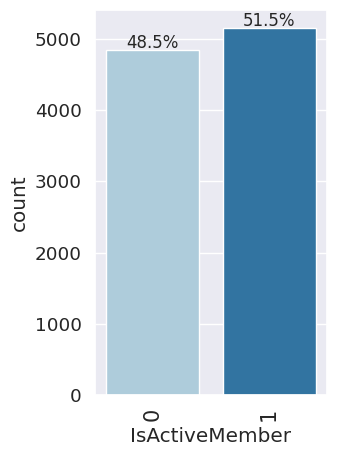

In [ ]:
labeled_barplot(Data, "IsActiveMember", perc=True)

- 51.5% of customers are active member of the bank i.e. using bank products regularly, making transactions while the remaining 48.5% are not active members

### Bivariate Analysis

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

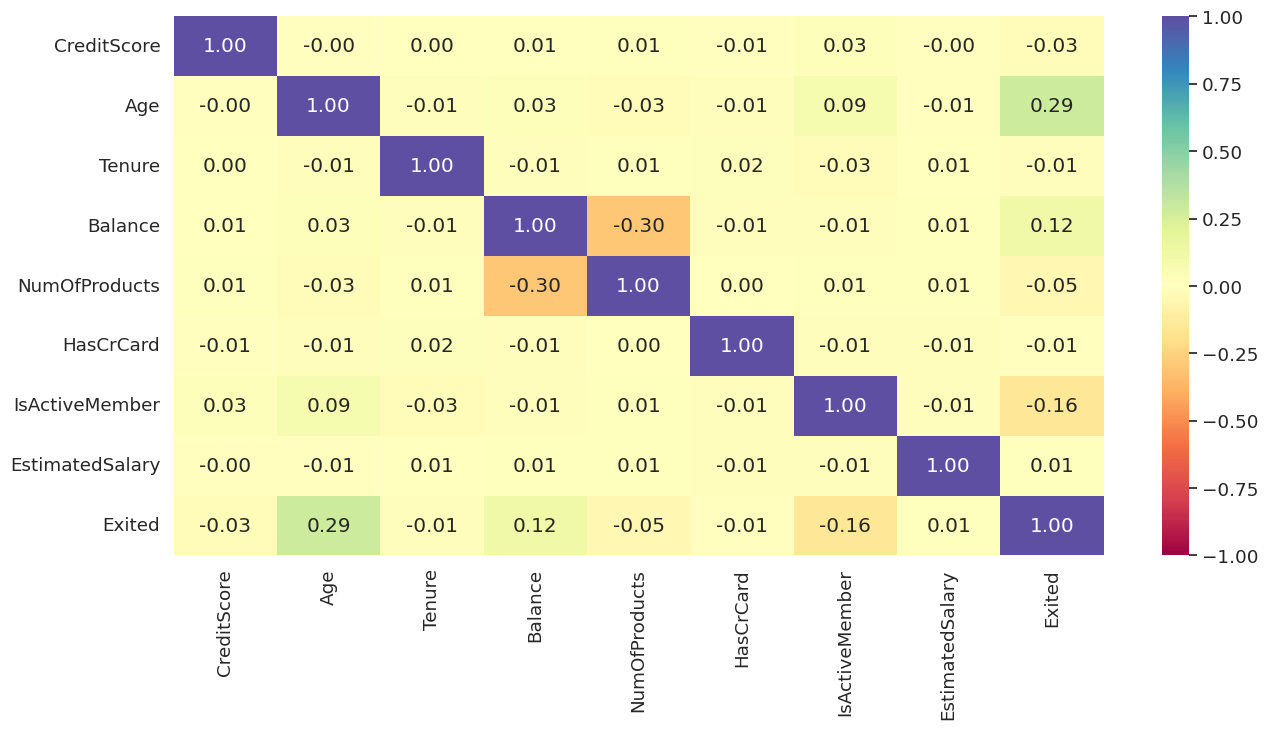

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(Data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Age is only moderately positively correlated with 'Exited'
- Number of products is moderately negatively correlated with Account Balance

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


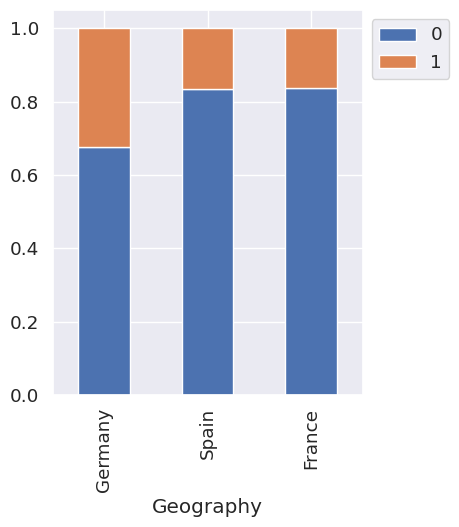

In [ ]:
stacked_barplot(Data, "Geography", "Exited" )

- There are more proportion of customers in Germany who have 'Exited' the bank.
- Almost equal proportion of customers from Spain and France have 'Exited' the bank.
- Note that actual numbers vary. i.e. More customers have exited from France but not more proportion of customers

#### Exited Vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


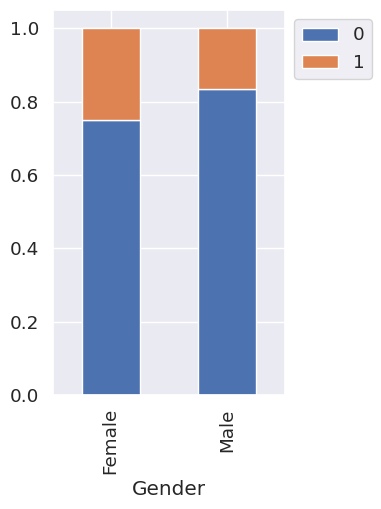

In [ ]:
stacked_barplot(Data, "Gender", "Exited")

- More proportion of female customers have exited the bank compared to proportion of male customers

#### Exited Vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


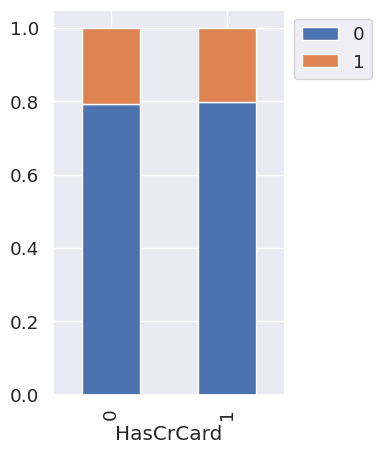

In [ ]:
stacked_barplot(Data, "HasCrCard", "Exited")

- Slightly more customers who have no credit card has 'Exited' the bank

#### Exited Vs Is active member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


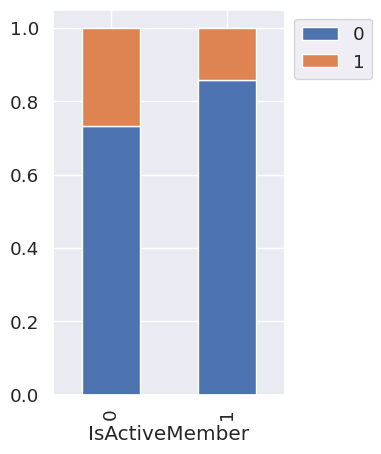

In [ ]:
stacked_barplot(Data, "IsActiveMember", "Exited")

- There are more proportion of active bank members who have NOT 'Exited' the bank when compared to the proportion of inactive members

#### Exited Vs Credit Score

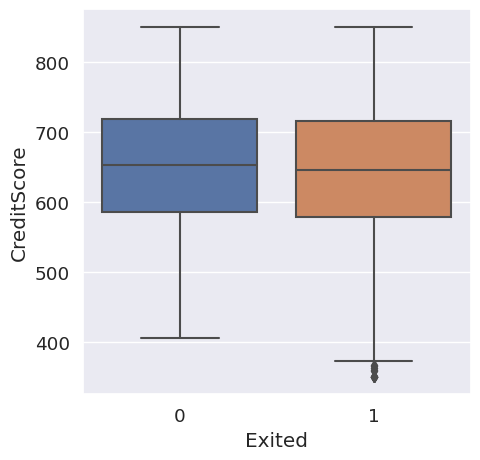

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=Data)
plt.show()

- Customers who have exited the bank have slightly lower median score than customers who have not exited the bank
- Credit score of customers who have exted the bank have outliers on the lower end of the

#### Exited Vs Age

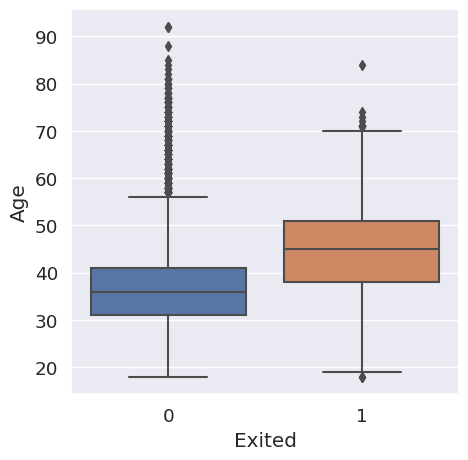

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=Data)
plt.show()

- Customers who have exited the bank have a higher median age than customers who have not exited the bank. This may be due to retirement, consequently leading to inactivity with banking activities
- The age of customers who have exited and not exited the bank have outliers on the upper end of the data

#### Exited Vs Tenure

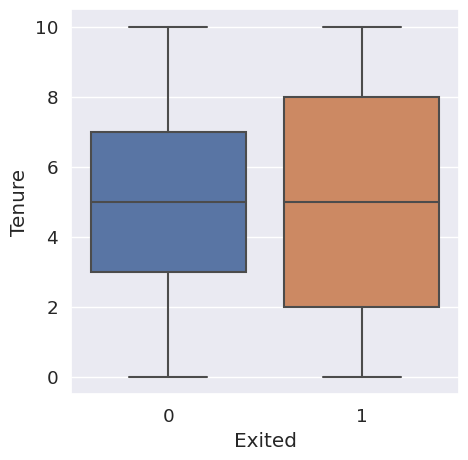

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=Data)
plt.show()

#### Exited Vs Balance

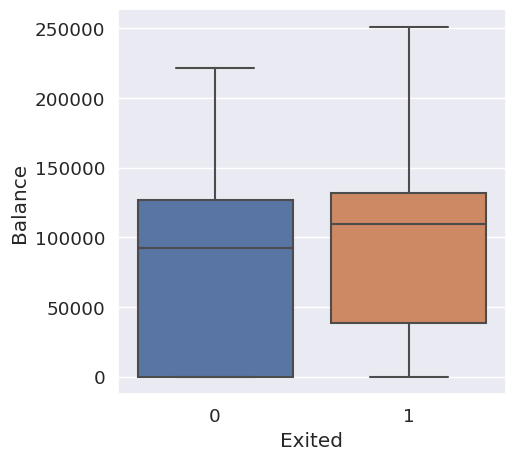

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=Data)
plt.show()

#### Exited Vs Number of Products

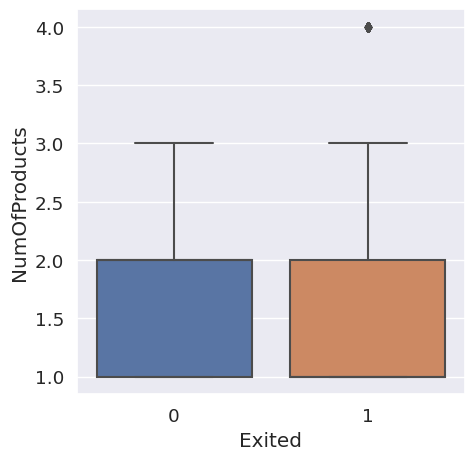

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=Data)
plt.show()

- The number of products that customers who have 'Exited' the bank have with the bank is proportional to the number of products with the number of products for customers who have not 'Exited' the bank, with the former having outler on the upper end of the data

#### Exited Vs Estimated Salary

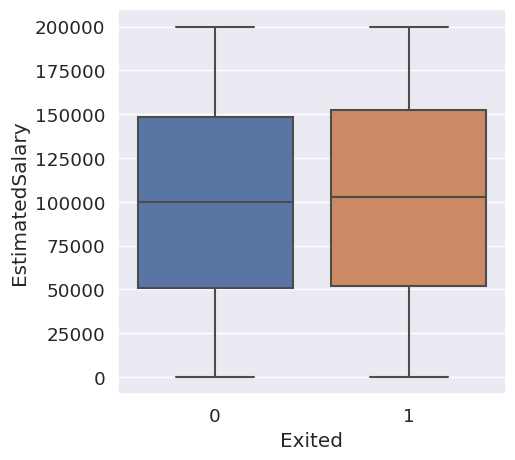

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=Data)
plt.show()

- Estimated salary of customers who have 'Exited' the bank is slightly higher than for customers who have NOT 'Exited the bank

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### Data Preparation for Modeling

In [ ]:
X = Data.drop(['Exited'],axis=1)   ##Independent features into variable X
y = Data[['Exited']]   ## Dependent features into variable y

In [ ]:
# Splitting the dataset into the Training and Testing set.
X_big, X_test, y_big, y_test = train_test_split(X,y, test_size = 0.2, random_state = 5,shuffle = True)

In [ ]:
# Splitting the dataset into the Training and validation set.
X_train, X_val, y_train, y_val = train_test_split(X_big,y_big, test_size = 0.2, random_state = 5,shuffle = True)

**Categorical Encoding**

In [ ]:
# Using pd.get dummies to encode the categorical columns (Geography, Gender) in the data
X_train = pd.get_dummies(X_train, columns=["Geography","Gender"], drop_first=True)  # Encode Geography and Gender in train set
X_test = pd.get_dummies(X_test, columns=["Geography","Gender"], drop_first=True)    # Encode Geography and Gender in test set
X_val = pd.get_dummies(X_val, columns=["Geography","Gender"], drop_first=True)      # Encode Geography and Gender in validation set


**Normalize the data**
It is important to normalize the numerical column in the dataset since they have different units. Scaling will help them be in the same range

In [ ]:
#scaling the data using standardscaler
sc = StandardScaler()

temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])


In [ ]:
# Scaling the Target variable (contionous variable)
y_train = sc.fit_transform(y_train)
y_val_scale = sc.transform(y_val)

In [ ]:
# Checking the shape
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(6400, 11)
(1600, 11)
(6400, 1)
(1600, 1)
(2000, 11)
(2000, 1)


## Building the Model

### Model Evaluation Criterion

**The model can make errors in the following scenarios:**

- Predicting that a customer will exit, but the customer does not exit.
- Predicting that a customer will not exit, but the customer exits.

**Which case holds greater significance?**

- It's more crucial for the model to avoid predicting that a customer won't exit when they actually do. This type of mistake could lead to losses for banks because they might miss taking necessary actions for those potentially departing customers.
How to minimize this type of loss, specifically reducing False Negatives?

- The bank should aim to maximize the Recall metric. A higher Recall translates to a lower chance of having False Negatives. In other words, the focus should be on increasing Recall or reducing False Negatives. This entails correctly identifying instances of the positive class (Class 1), which in this context means customers who are actually planning to exit. By achieving this, the bank can better retain their valuable customers.

**Create a function for plotting the confusion matrix**



In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

### Model Building: Neural Network

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the Artificial Neural Network model
from tensorflow.keras.initializers import he_uniform
# Initializing the ANN
model = Sequential()

# Adding the input layer with 64 neurons, 'relu' activation function, and input of 11 variables
model.add(Dense(units=64, activation='relu', input_dim=11))

# Adding the 1st hidden layer with 32 neurons and 'relu' activation function
model.add(Dense(units=32, activation='relu'))

# Adding the output layer with one node and 'sigmoid' activation function
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


**Observations**
- The summary of the model shows each layer's name, type, output shape, and the number of parameters at that particular layer.
- It also shows the total number of trainable and non-trainable parameters in the model. A parameter whose value is learned while training the model is called a trainable parameter otherwise it is called a non-trainable parameter.
- In the first layer total parameters are calculated by the number of neurons in the hidden layer multiplied by the number of variables fed to neural networks plus bias. (11*64)+64 = 768
- In the next layer the parameters are calculated by the number of outputs from the previous layer multiplied by the number of neurons in the second layer plus bias. (64*32)+32 =2080
- In the final layer, the parameters for the output are calculated as follows
(1*32)+1 =33

In [ ]:
# Compile the model with SGD optimizer and binary cross entropy as loss with accuracy as metrics
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

#fit the model on train data for 100 epochs
history = model.fit(X_train, y_train,
                         validation_data=(X_val, y_val),
                         epochs=100,
                         batch_size=32)


Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: -0.0932 - accuracy: 0.0000e+00 - val_loss: 0.9700 - val_accuracy: 0.7987
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: -9.5881 - accuracy: 0.0000e+00 - val_loss: 29.5927 - val_accuracy: 0.8044
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 5387626479616.0000 - accuracy: 0.0000e+00 - val_loss: 0.5267 - val_accuracy: 0.7987
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 69370408.0000 - accuracy: 0.0000e+00 - val_loss: 0.5022 - val_accuracy: 0.7987
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1943 - accuracy: 0.0000e+00 - val_loss: 0.5107 - val_accuracy: 0.7987
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1459 - accuracy: 0.0000e+00 - val_loss: 0.5283 - val_accuracy: 0.7987
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.1160 - accuracy: 0.

63/63 [==============================] - 0s 1ms/step - loss: 1.0698 - accuracy: 0.7975


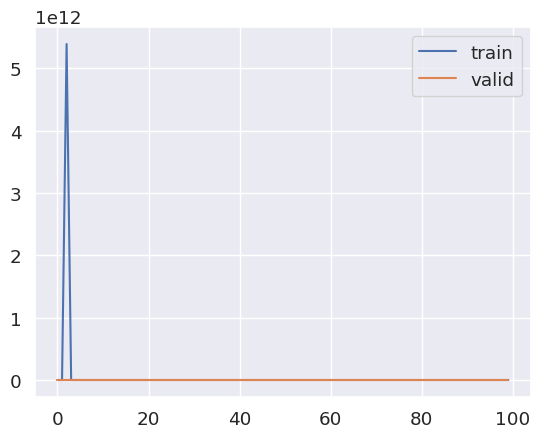

In [ ]:
# Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train", "valid"), loc=0)

# Evaluate the model on X_test and y_test
results = model.evaluate(X_test, y_test)


- Here the model does not seem to overfit as distance between train curve and validation curve does not increase

50/50 [==============================] - 0s 945us/step


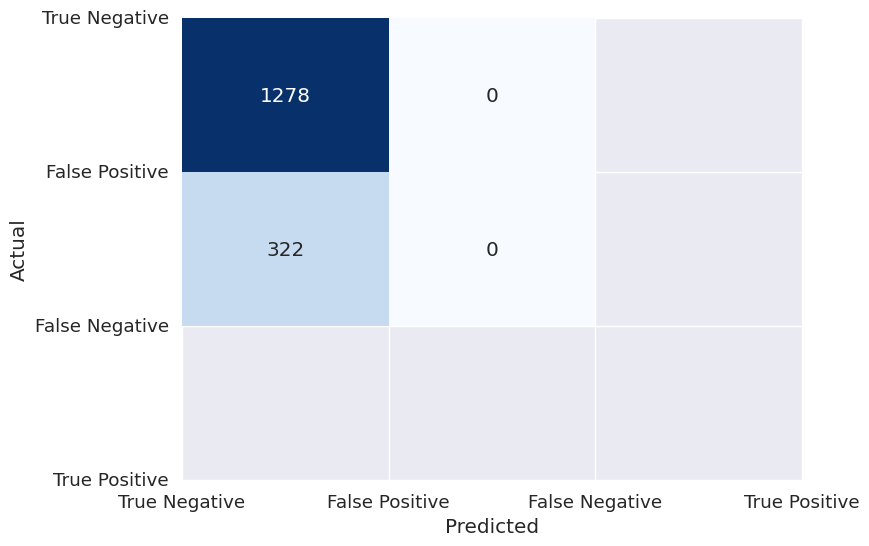

In [ ]:
# Obtain predictions on X_val
y_pred1 = model.predict(X_val)

# Let's predict using default threshold
y_pred1 = (y_pred1 > 0.5)

# Calculate confusion matrix
cm2 = confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = ['Not_Exited','Exited']

# Function to create and plot a confusion matrix
def make_confusion_matrix(cm, group_names=None, categories='auto', count=True, percent=False, fontsize=12, figsize=(8, 6)):
    sns.set(font_scale=1.2)
    if percent:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt = '.2%'

    else:
        fmt = 'd'
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt=fmt, cmap='Blues', cbar=False, xticklabels=categories, yticklabels=categories)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    if group_names:
        tick_marks = np.arange(len(group_names))
        plt.xticks(tick_marks, group_names)
        plt.yticks(tick_marks, group_names, rotation=0, verticalalignment='center')
    plt.show()

# Create and show confusion matrix
make_confusion_matrix(cm2, group_names=labels, categories=categories)


### Model Building: Neural Network model with Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
def create_model():
    ## Initializing the neural network
    model = Sequential()

    ## Adding the input layer with 64 neurons and relu activation function
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))

    ## Adding the first hidden layer with 32 neurons and relu activation function
    model.add(Dense(32, activation='relu'))

    ## Adding the output layer with Sigmoid activation
    model.add(Dense(1, activation='sigmoid'))

    ## Initializing the model with Adam optimizer
    optimizer = tf.keras.optimizers.Adam(0.001)

    ## Compiling the model with binary cross entropy as the loss function and accuracy as metrics
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model



In [ ]:
model=create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting the model on train and validation with 100 epochs
history = model.fit(X_train, y_train,batch_size=32,validation_data=(X_val,y_val),epochs=100,verbose=1)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: -1.2472 - accuracy: 0.0000e+00 - val_loss: 2.3954 - val_accuracy: 0.8087
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: -24.1225 - accuracy: 0.0000e+00 - val_loss: 29.7178 - val_accuracy: 0.8081
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: -126.0405 - accuracy: 0.0000e+00 - val_loss: 116.3518 - val_accuracy: 0.8081
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: -359.9076 - accuracy: 0.0000e+00 - val_loss: 279.1243 - val_accuracy: 0.8112
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: -760.0312 - accuracy: 0.0000e+00 - val_loss: 535.7994 - val_accuracy: 0.8119
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: -1356.7117 - accuracy: 0.0000e+00 - val_loss: 927.2419 - val_accuracy: 0.8106
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: -2193.1323 - accur

**Loss function**

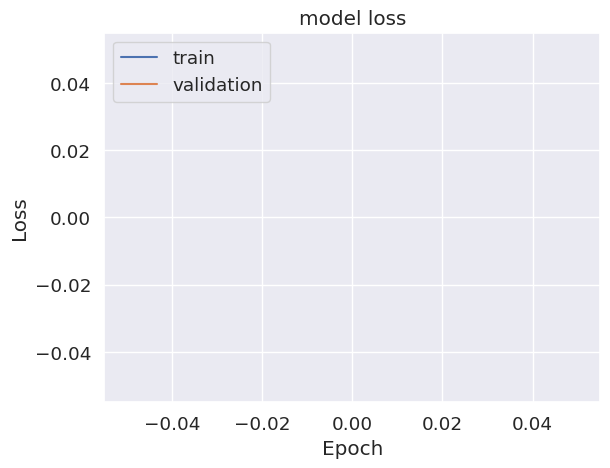

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

The presented image indicates a clear case of severe overfitting in the model. Given the vast number of parameters inherent to deep learning models, they are particularly susceptible to overfitting, a situation where the model performs exceedingly well on the training data but poorly on new, unseen data. To mitigate this, it's crucial to pinpoint the ideal moment to halt the training process.

The most effective remedy in this context is referred to as **Early Stopping.**

**Early Stopping:**

Throughout the training phase, the model's performance on a separate validation dataset is assessed after every epoch. If this evaluation demonstrates a decline in performance, such as an increase in loss or a drop in accuracy, or if there's no noteworthy improvement, the training is terminated prior to its intended completion. The model at the point of termination is recognized as possessing solid generalization capabilities.

This technique is known as "early stopping," and it stands as one of the earliest and most widely practiced forms of neural network regularization. Its application is aimed at curbing overfitting by selecting the model version that provides the best balance between performance on the training data and its generalization to new data.

In [ ]:
# Importing callbacks API
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

# Calling the create_model() function
model_e = create_model()

# Training the model on X_train and y_train for 50 epochs and using X_val and y_val as validation_data
history_e = model_e.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1, validation_data=(X_val, y_val), callbacks=[es_cb])


Epoch 1/50
200/200 [==============================] - 1s 2ms/step - loss: -1.2097 - accuracy: 0.0000e+00 - val_loss: 2.6740 - val_accuracy: 0.8112
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: -30.3636 - accuracy: 0.0000e+00 - val_loss: 37.5176 - val_accuracy: 0.8131
Epoch 3/50
200/200 [==============================] - 0s 1ms/step - loss: -167.5992 - accuracy: 0.0000e+00 - val_loss: 150.2333 - val_accuracy: 0.8106
Epoch 4/50
200/200 [==============================] - 0s 1ms/step - loss: -487.1334 - accuracy: 0.0000e+00 - val_loss: 365.0765 - val_accuracy: 0.8106
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: -1035.7788 - accuracy: 0.0000e+00 - val_loss: 693.3641 - val_accuracy: 0.8087
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: -1857.7621 - accuracy: 0.0000e+00 - val_loss: 1210.1162 - val_accuracy: 0.8087


**Loss function**

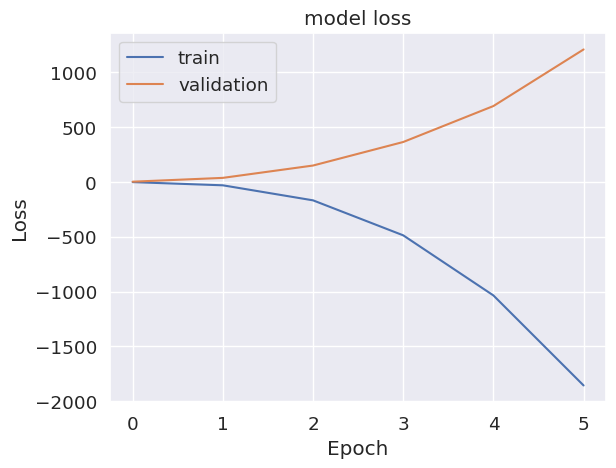

In [ ]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_e.history['loss'])
plt.plot(history_e.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

- The training and validation curves start to diverge as the number of epochs increases, it indicates a potential issue of overfitting


**Let's tune the threshold using ROC-AUC**


There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = TruePositive / (TruePositive + FalseNegative)


Specificity = TrueNegative / (FalsePositive + TrueNegative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score() and select the threshold with the largest G-Mean value.

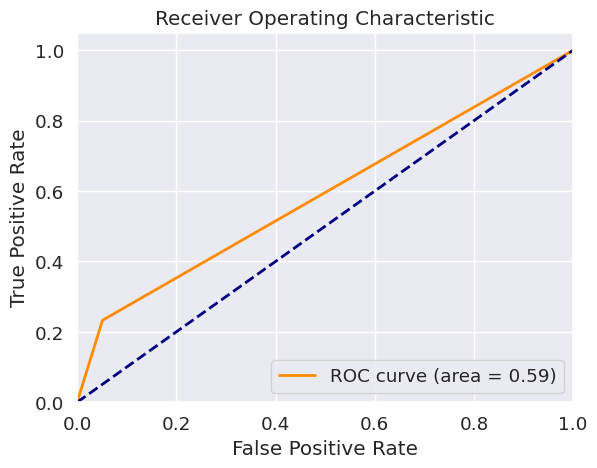

In [ ]:
# Assuming you have already imported necessary libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Set a threshold to convert predicted probabilities into binary labels
threshold = 0.5  # You can adjust this threshold based on your problem

# Apply the threshold to the predicted probabilities
yhat_binary = (yhat > threshold).astype(int)

# Assuming y_train contains continuous values
# Map continuous values to binary labels based on the threshold
y_train_binary = (y_train > threshold).astype(int)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train_binary, yhat_binary)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


**Predict the results using  the best  threshold**

In [ ]:
# Calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1 - fpr))

# Locate the index of the largest g-mean
ix = np.argmax(gmeans)

# Predicting the results using the best threshold
y_pred_e = model_e.predict(X_val)
y_pred_e = (y_pred_e > thresholds[ix])

# Print the predicted results
print(y_pred_e)

50/50 [==============================] - 0s 755us/step
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


**Classification report**

In [ ]:
# Obtain the classification report
cr = metrics.classification_report(y_val, y_pred_e)

# Print the classification report
print(cr)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1278
           1       0.00      0.00      0.00       322

    accuracy                           0.80      1600
   macro avg       0.40      0.50      0.44      1600
weighted avg       0.64      0.80      0.71      1600



**Confusion matrix**

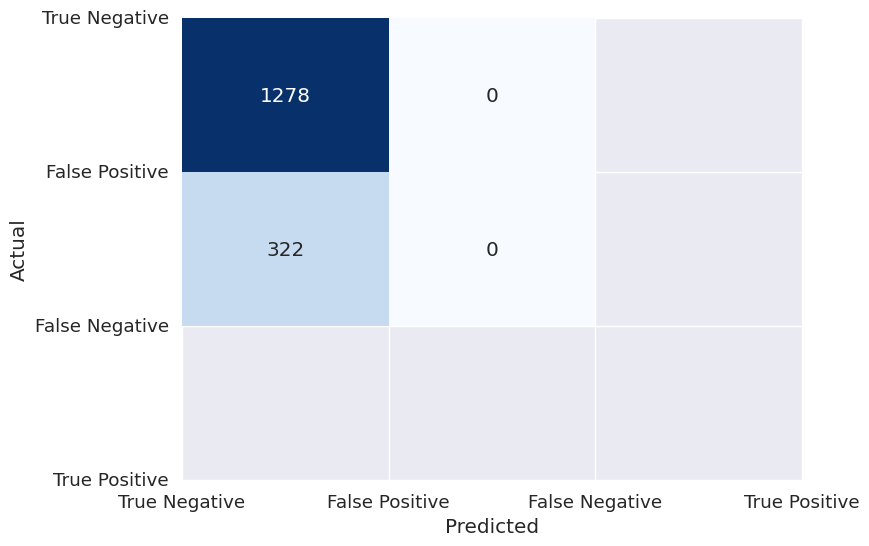

In [ ]:
# Calculate confusion matrix
cm1 = confusion_matrix(y_val, y_pred_e)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = ['Not_Exited','Exited']

# Function to create and plot a confusion matrix
def make_confusion_matrix(cm, group_names=None, categories='auto', count=True, percent=False, fontsize=12, figsize=(8, 6)):
    sns.set(font_scale=1.2)
    if percent:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt = '.2%'

    else:
        fmt = 'd'
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt=fmt, cmap='Blues', cbar=False, xticklabels=categories, yticklabels=categories)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    if group_names:
        tick_marks = np.arange(len(group_names))
        plt.xticks(tick_marks, group_names)
        plt.yticks(tick_marks, group_names, rotation=0, verticalalignment='center')
    plt.show()

# Create and show confusion matrix
make_confusion_matrix(cm1, group_names=labels, categories=categories)


### Model Improvement: Neural Network model with Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
# Initializing the neural network
model_3 = Sequential()

# Adding the input layer with 32 neurons and relu as activation function
model_3.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))

# Adding dropout with dropout_rate= 0.2
model_3.add(Dropout(0.2))

# Adding the first hidden layer with 16 neurons with relu as activation function
model_3.add(Dense(16, activation='relu'))

# Adding dropout with dropout_rate= 0.1
model_3.add(Dropout(0.1))

# Adding the second hidden layer with 8 neurons with relu as activation function
model_3.add(Dense(8, activation='relu'))

# Adding the output layer
model_3.add(Dense(1, activation='sigmoid'))


In [ ]:
# Summary of the model
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainabl

In [ ]:
# Initialize the ANN with Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Compile the model with binary cross entropy as loss function and accuracy as metrics
model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_3 = model_3.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: -0.1433 - accuracy: 0.0000e+00 - val_loss: 1.2464 - val_accuracy: 0.7987
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: -13.8089 - accuracy: 0.0000e+00 - val_loss: 22.6230 - val_accuracy: 0.8087
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: -160.5765 - accuracy: 0.0000e+00 - val_loss: 172.2309 - val_accuracy: 0.8075
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: -764.5245 - accuracy: 0.0000e+00 - val_loss: 647.9313 - val_accuracy: 0.8069
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: -2346.1414 - accuracy: 0.0000e+00 - val_loss: 1735.9901 - val_accuracy: 0.8056
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: -5473.5874 - accuracy: 0.0000e+00 - val_loss: 3831.0471 - val_accuracy: 0.8062


**Loss function**

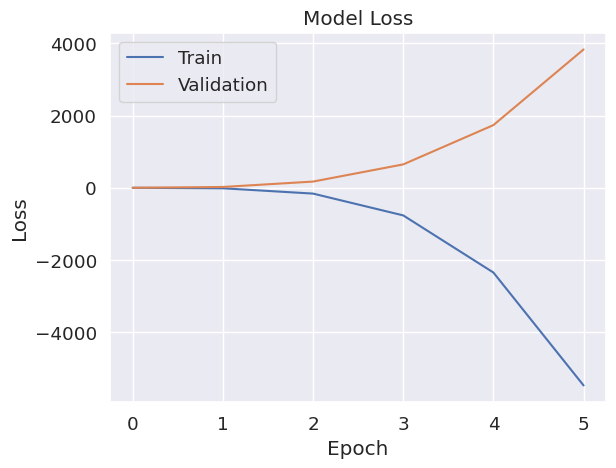

In [ ]:
#Plotting the train loss and validation loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


- Again, the training and validation curves start to diverge as the number of epochs increases, it indicates a potential issue of overfitting

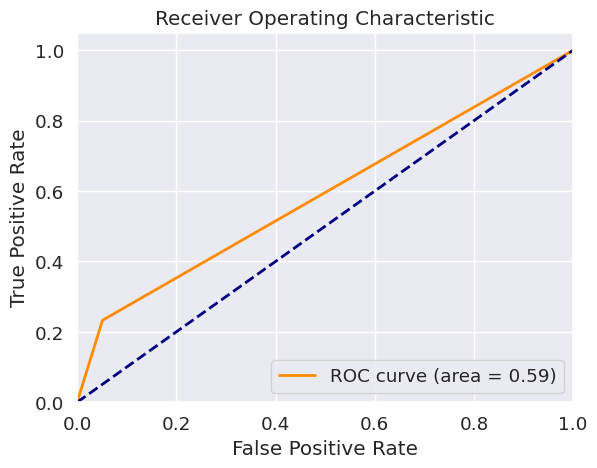

In [ ]:
# Assuming you have already imported necessary libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Set a threshold to convert predicted probabilities into binary labels
threshold = 0.5  # You can adjust this threshold based on your problem

# Apply the threshold to the predicted probabilities
yhat_binary = (yhat > threshold).astype(int)

# Assuming y_train contains continuous values
# Map continuous values to binary labels based on the threshold
y_train_binary = (y_train > threshold).astype(int)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train_binary, yhat_binary)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()





**Predict the results using  the best  threshold**

In [ ]:
#Predicting the results using best as a threshold
y_pred_e=model_3.predict(X_val)
y_pred_3 = (y_pred_e > thresholds[ix])
y_pred_3

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

**Classification report**

In [ ]:
# Assuming you have already defined y_pred_3 and y_val
cr = metrics.classification_report(y_val, y_pred_3)
print(cr)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1278
           1       0.00      0.00      0.00       322

    accuracy                           0.80      1600
   macro avg       0.40      0.50      0.44      1600
weighted avg       0.64      0.80      0.71      1600



**Confusion report**

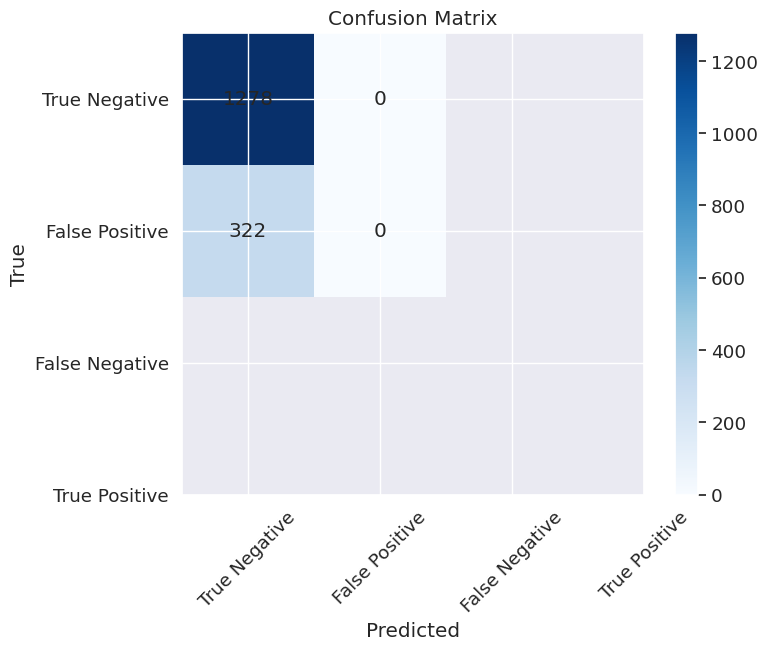

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have defined y_pred_3 and y_val
cm = confusion_matrix(y_val, y_pred_3)

# Define the labels and categories
labels = ['Not_Exited', 'Exited']
categories = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(categories))
plt.xticks(tick_marks, categories, rotation=45)
plt.yticks(tick_marks, categories)
plt.xlabel('Predicted')
plt.ylabel('True')

# Adding text annotations
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, str(cm[i, j]), horizontalalignment="center", verticalalignment="center")

plt.show()


### Model Improvement: Neural Network model with Hyperparameter tuning

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
def create_model_v2(dropout_rate=0.1, lr=0.001, layer_1=64, layer_2=32):
    np.random.seed(1337)

    # Initializing the neural network
    model = Sequential()

    # This adds the input layer (by specifying input dimension)
    model.add(Dense(layer_1, activation='relu', input_dim=X_train.shape[1]))

    # Complete the code by adding dropout with dropout rate=0.5
    model.add(Dropout(0.5))

    # Adding the hidden layer
    model.add(Dense(layer_2, activation='relu'))

    # Adding the output layer
    # Notice that we do not need to specify input dim.
    # we have an output of 1 node, which is the desired dimensions of our output (stay with the bank or not)
    # We use the sigmoid because we want probability outcomes
    model.add(Dense(1, activation='sigmoid'))

    # Adding Adam initializer
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    # Complete the code to compile the model using binary_crossentropy as loss
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


**Using Grid search**

We are using grid search to optimize two hyperparameters called **batch size, epochs** due to the limited time. But you can optimize the other hyperparameters as mentioned above

In [ ]:
## Calling the creat_model_v2 function in KerasClassifier
keras_estimator = KerasClassifier(build_fn=create_model_v2, verbose=1)


In [ ]:
# define the grid search parameters
param_grid = {
    'batch_size':[40, 64, 128],
    "lr":[0.01,0.001,0.1]}


kfold_splits = 3
# Using the the defined keras_estimator as estimator.
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_grid=param_grid, n_jobs=-1)


In [ ]:
## Fit the model on train data and use x_val and y_val as validation data
grid_result = grid.fit(X_train, y_train, validation_data=(X_val, y_val), verbose=1)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Printing mean
means = grid_result.cv_results_['mean_test_score']

# Printing standard deviation
stds = grid_result.cv_results_['std_test_score']

# Printing best parameters
params = grid_result.cv_results_['params']


Fitting 3 folds for each of 9 candidates, totalling 27 fits
50/50 [==============================] - 1s 5ms/step - loss: 0.4630 - accuracy: 0.7942 - val_loss: 0.4152 - val_accuracy: 0.8194
Best: 0.812499 using {'batch_size': 128, 'lr': 0.01}


**Creating the final model with the obtained configuration after hyperparameter tuning**

In [ ]:
# Creating the model
estimator_v2=create_model_v2(lr=grid_result.best_params_['lr'])
# Printing model summary
estimator_v2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Fit the model on train data and train the model with best batch_size obtained from hyperparameter tuning
history_h = estimator_v2.fit(X_train, y_train, epochs=100, batch_size=grid_result.best_params_['batch_size'], verbose=1, validation_data=(X_val, y_val))


Epoch 1/100
50/50 [==============================] - 1s 4ms/step - loss: -14.5425 - accuracy: 0.0000e+00 - val_loss: 37.8112 - val_accuracy: 0.8112
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: -432.8581 - accuracy: 0.0000e+00 - val_loss: 609.9715 - val_accuracy: 0.8100
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: -2723.5513 - accuracy: 0.0000e+00 - val_loss: 2746.9141 - val_accuracy: 0.8131
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: -9165.3809 - accuracy: 0.0000e+00 - val_loss: 7780.5649 - val_accuracy: 0.8119
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: -21955.9219 - accuracy: 0.0000e+00 - val_loss: 16447.4199 - val_accuracy: 0.8106
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: -43643.7617 - accuracy: 0.0000e+00 - val_loss: 31075.8691 - val_accuracy: 0.8125
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: -75235.2266 - acc

**Loss function**

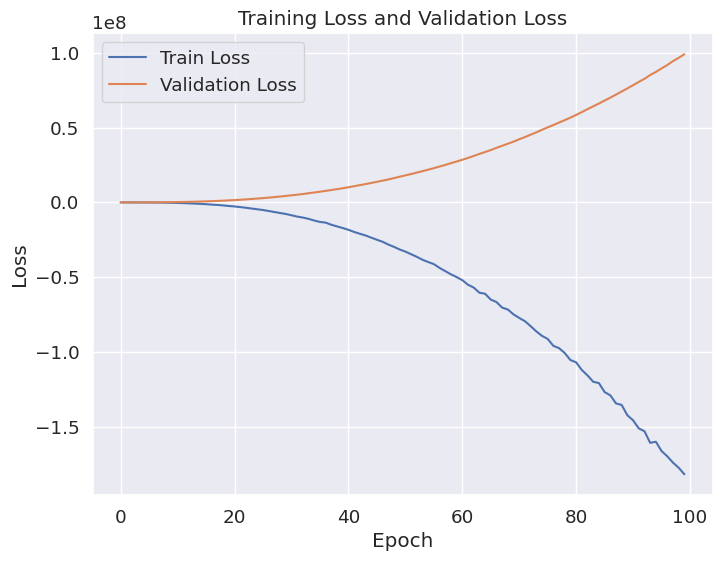

In [ ]:
N = 100
plt.figure(figsize=(8, 6))
plt.plot(np.arange(N), history_h.history["loss"], label="Train Loss")
plt.plot(np.arange(N), history_h.history["val_loss"], label="Validation Loss")

plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


**Threshold**

200/200 [==============================] - 0s 897us/step


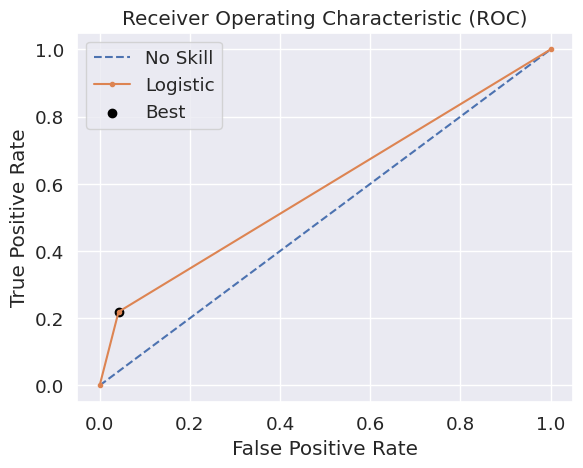

Best Threshold=1.000000, G-Mean=0.470
ROC AUC: 0.5886186055579717


In [ ]:
# Assuming you have already imported necessary libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_train contains continuous values
# Map continuous values to binary labels based on a threshold (e.g., 0.5)
threshold = 0.5  # You can adjust this threshold based on your problem
y_train_binary = (y_train > threshold).astype(int)

# predict probabilities
yhat = estimator_v2.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train_binary, yhat)
roc_auc = auc(fpr, tpr)

# plot the ROC curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('Receiver Operating Characteristic (ROC)')
plt.show()

print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
print('ROC AUC:', roc_auc)


**Predict the results using  the best  threshold**

In [ ]:
# To obtain the predictions on X_val
# Complete the code to obtain the predictions on X_val
y_pred_h = estimator_v2.predict(X_val)
print(y_pred_h)


50/50 [==============================] - 0s 1ms/step
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [ ]:
# To use the confusion matrix, we need to convert the probabilities into binary predictions.
# We'll use the best threshold value that you've calculated earlier.
best_threshold = thresholds[ix]
y_pred_binary = (y_pred_h > best_threshold).astype(int)
print(y_pred_binary)


[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


**Classification report**

In [ ]:
# To obtain the classification report
cr = metrics.classification_report(y_val, y_pred_h)
print(cr)


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1278
           1       0.59      0.23      0.33       322

    accuracy                           0.81      1600
   macro avg       0.71      0.60      0.61      1600
weighted avg       0.78      0.81      0.78      1600



**Confusion matrix**

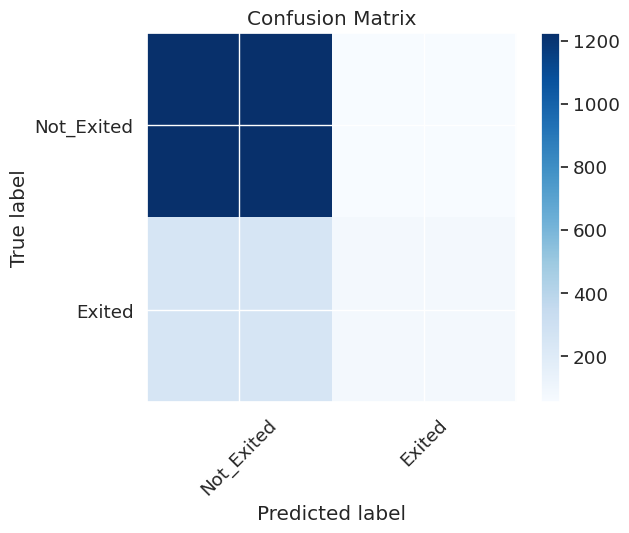

In [ ]:
## To obtain the confusion matrix
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, cmap='Blues'):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Assuming you have already defined y_pred_h and y_val
cm_h = confusion_matrix(y_val, y_pred_h)
class_names = ['Not_Exited', 'Exited']

plot_confusion_matrix(cm_h, classes=class_names, cmap='Blues')



### Model Improvement: Neural Network model with balanced data

**Now try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [ ]:
# Convert continuous labels to binary labels using a threshold
threshold = 0.5  # Adjust this threshold based on your problem
y_train_binary = (y_train > threshold).astype(int)

# Apply SMOTE with the binary labels
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train_binary)

print('After UpSampling, the shape of train_X: {}'.format(X_train_resampled.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_resampled.shape))


After UpSampling, the shape of train_X: (10180, 11)
After UpSampling, the shape of train_y: (10180,) 



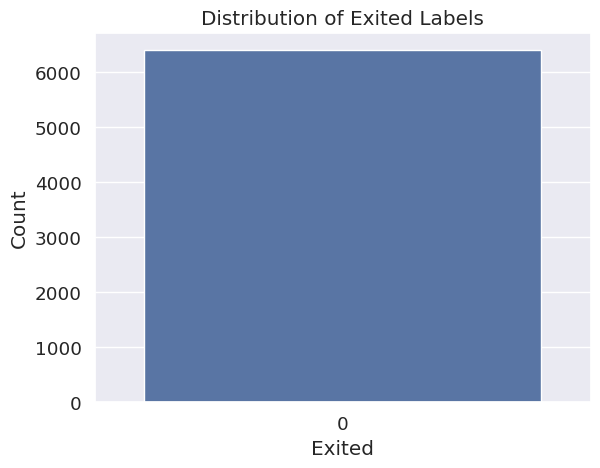

In [ ]:
# Assuming 'y_train' is a pandas Series or a NumPy array
sns.countplot(y_train)
plt.title('Distribution of Exited Labels')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

**Build a model with the balanced dataset**

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
# Initialize a sequential model
model_4 = Sequential()

# Add an input layer with 32 neurons and relu activation function
model_4.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))

# Add dropout with dropout rate=0.2
model_4.add(Dropout(0.2))

# Adding hidden layer with 16 neurons and relu activation function
model_4.add(Dense(16, activation='relu'))

# Adding the dropout
model_4.add(Dropout(0.1))

# Add dense layer with 8 neurons and relu activation function
model_4.add(Dense(8, activation='relu'))

# Add sigmoid activation function in the final layer
model_4.add(Dense(1, activation='sigmoid'))


In [ ]:
# Obtain the summary of the model
model_4.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainabl

In [ ]:
# Define EarlyStopping callback
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

# Initializing Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Compiling the model with binary cross entropy as loss and accuracy as metrics
model_4.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the model on train data with batch_size of 64, epochs of 100, and EarlyStopping callback
history_4 = model_4.fit(X_train_resampled, y_train_resampled, batch_size=64, epochs=100, verbose=1, validation_data=(X_val, y_val), callbacks=[es_cb])


Epoch 1/100
160/160 [==============================] - 1s 2ms/step - loss: 0.6480 - accuracy: 0.6247 - val_loss: 0.5571 - val_accuracy: 0.7325
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5855 - accuracy: 0.7038 - val_loss: 0.5174 - val_accuracy: 0.7550
Epoch 3/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5695 - accuracy: 0.7185 - val_loss: 0.5254 - val_accuracy: 0.7425
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5573 - accuracy: 0.7220 - val_loss: 0.5555 - val_accuracy: 0.7188
Epoch 5/100
160/160 [==============================] - 0s 3ms/step - loss: 0.5460 - accuracy: 0.7276 - val_loss: 0.5111 - val_accuracy: 0.7550
Epoch 6/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5384 - accuracy: 0.7285 - val_loss: 0.5250 - val_accuracy: 0.7394
Epoch 7/100
160/160 [==============================] - 1s 5ms/step - loss: 0.5266 - accuracy: 0.7384 - val_loss: 0.4959 - val_accuracy: 0.7600

**Loss function**

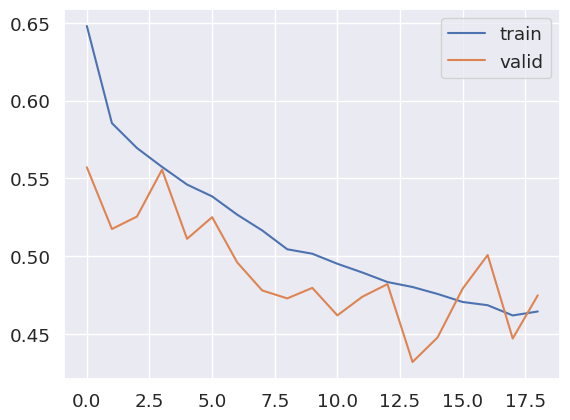

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_4.history)
hist['epoch'] = history_4.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

**Finding the optimal  threshold**

319/319 [==============================] - 0s 1ms/step
Best Threshold=0.535352, G-Mean=0.805


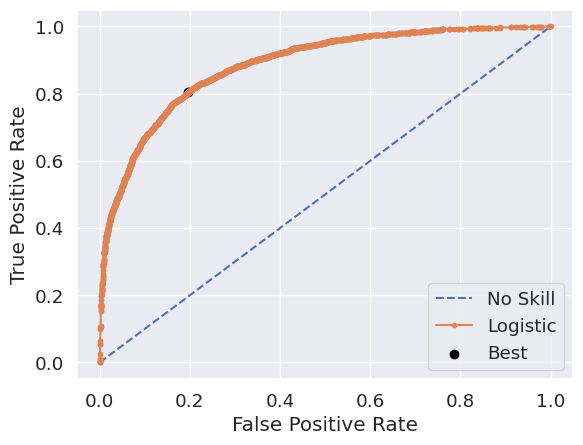

In [ ]:
# Predict probabilities
yhat = model_4.predict(X_train_resampled)
# Keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# Calculate ROC curves
fpr, tpr, thresholds = roc_curve(y_train_resampled, yhat)
# Calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# Locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# Plot the ROC curve for the model
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# Show the plot
plt.show()


In [ ]:
# Obtain predictions on X_val
y_pred_s = model_4.predict(X_val)
# Predicting the results using tuned threshold
y_pred_s = (y_pred_s > thresholds[ix])
y_pred_s


50/50 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

**Classification report**

In [ ]:
cr=metrics.classification_report(y_val,y_pred_s)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1278
           1       0.49      0.75      0.59       322

    accuracy                           0.79      1600
   macro avg       0.71      0.78      0.73      1600
weighted avg       0.84      0.79      0.81      1600



**Confusion matrix**

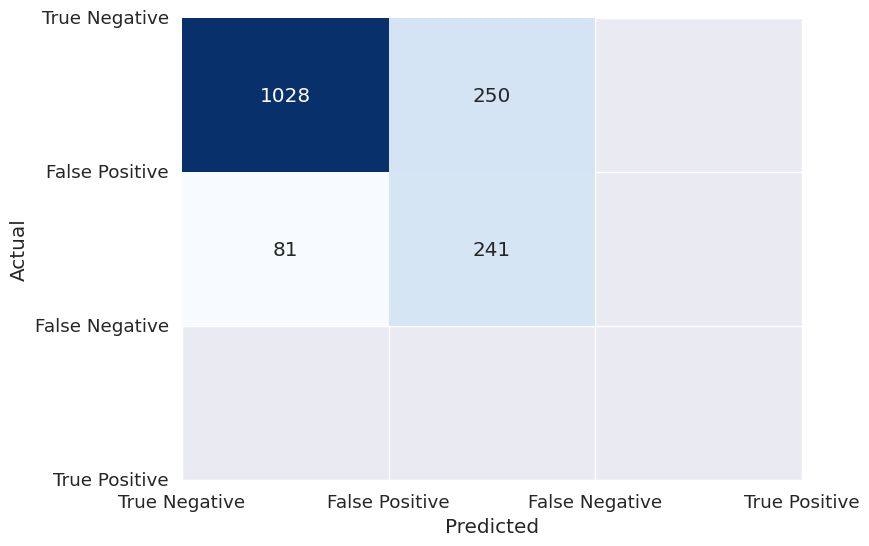

In [ ]:
# Calculate the confusion matrix
cm_s = confusion_matrix(y_val, y_pred_s)
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['Not_Exited', 'Exited']
make_confusion_matrix(cm_s,
                      group_names=labels,
                      categories=categories)


- Model 4 is the best model

## Final Model




50/50 [==============================] - 0s 2ms/step
Best Threshold=0.563030, G-Mean=0.779


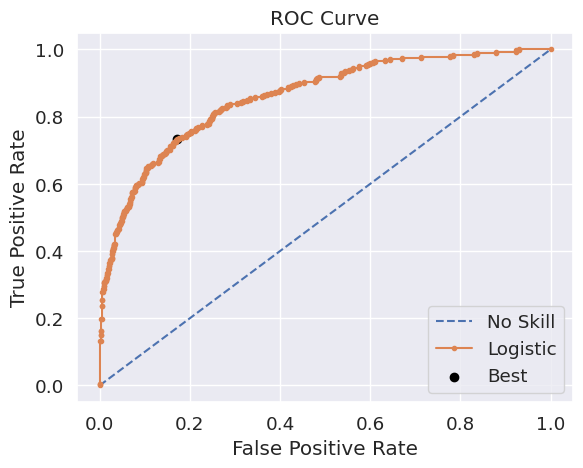

In [ ]:
yhat_val = model_4.predict(X_val)
yhat_probs_val = yhat_val[:, 0]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_val, yhat_probs_val)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1 - fpr))

# locate the index of the largest g-mean
ix = np.argmax(gmeans)
best_threshold = thresholds[ix]
best_gmean = gmeans[ix]

print('Best Threshold=%f, G-Mean=%.3f' % (best_threshold, best_gmean))

# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()

In [ ]:
# To Predict the X_test data using the best model
y_pred_s = model_4.predict(X_val)
y_pred_s = (y_pred_s > best_threshold)
y_pred_s


50/50 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

**Classification report**

In [ ]:
cr=metrics.classification_report(y_val,y_pred_s)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1278
           1       0.52      0.73      0.61       322

    accuracy                           0.81      1600
   macro avg       0.72      0.78      0.74      1600
weighted avg       0.84      0.81      0.82      1600



**Confusion report**

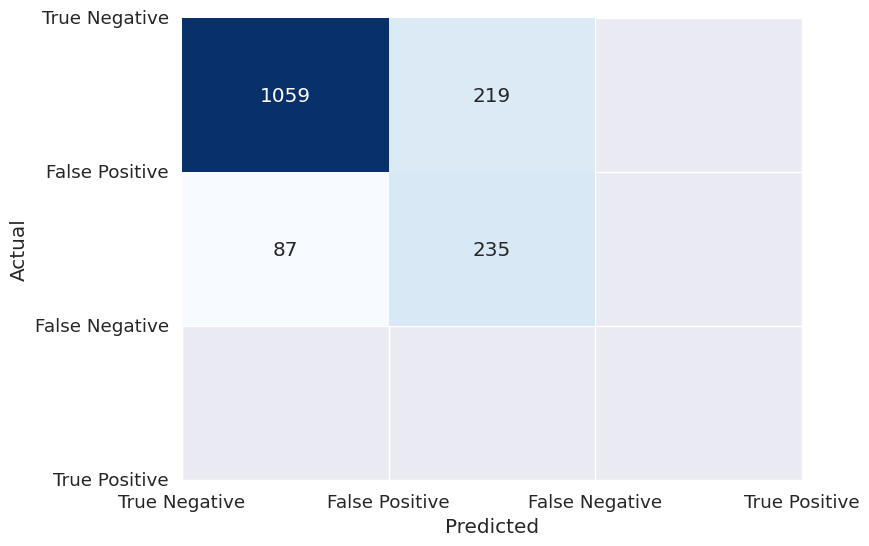

In [ ]:
#Calculating the confusion matrix
cm_s=confusion_matrix(y_val, y_pred_s)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_s,
                      group_names=labels,
                      categories=categories)


## Actionable Insights and Business Recommendations

- Precision and Recall Trade-off: The precision for class 1 (Exited) is 0.52, indicating that when the model predicts a customer will exit the bank, it's correct only 52% of the time. The recall for class 1 is 0.73, which means that the model is able to correctly identify 73% of the customers who actually exited the bank. There's a trade-off between precision and recall – by adjusting the threshold, we can increase precision at the cost of lower recall, or vice versa.

- Class Imbalance: The dataset seems to have an imbalance between the two classes. The F1-score for class 1 is 0.61, which is lower than the F1-score for class 0 (0.87). This indicates that the model is struggling to correctly classify the minority class (Exited), possibly due to the imbalance.

- Accuracy: The overall accuracy of the model is 0.81, which is decent but can be misleading due to the class imbalance. High accuracy can be achieved by predicting the majority class correctly while ignoring the minority class.

- Recommendation 1 - Handling Imbalance: Since there is a class imbalance, consider using techniques like oversampling (SMOTE) or undersampling to balance the classes. This might improve the model's ability to predict the minority class.

- Recommendation 2 - Threshold Adjustment: Depending on the business context, you might want to adjust the threshold for classification. This can help optimize the trade-off between precision and recall according to your specific goals.

- Recommendation 3 - Feature Engineering: It's important to analyze the features used for prediction. Are they the most relevant and informative features?

- Recommendation 4 - Hyperparameter Tuning: Hyperparameter tuning might lead to better model performance. We can experiment with different network architectures, learning rates, dropout rates, and other hyperparameters to find the best combination.

- Recommendation 5 - Further Evaluation: Besides ROC curves and classification reports, consider other evaluation metrics like AUC-ROC, AUC-PR (Area Under the Precision-Recall Curve), and possibly cost-sensitive evaluation if misclassifications have different costs.